# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

# Merge the mouse metadata and study results on 'Mouse ID'
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the combined DataFrame
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

# Get the count of unique mouse IDs in the combined DataFrame
unique_mice_count = combined_data['Mouse ID'].nunique()

# Filter the combined DataFrame to include only data related to mice with the expected count of unique IDs
filtered_data = combined_data[combined_data['Mouse ID'].isin(combined_data['Mouse ID'].value_counts().index)]

# Get the count of unique mice in the filtered DataFrame
num_filtered_mice = filtered_data['Mouse ID'].nunique()

# Print the count of unique mice
num_filtered_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()

# Display the duplicate mice
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# # Filter the combined DataFrame to include only data for the duplicate mouse ID
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] =="g989"]

# # Display all the data for the duplicate mouse ID
# duplicate_mouse_data
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Using the drop_duplicates()

clean_data = combined_data.loc[combined_data['Mouse ID'] !="g989"]

# Display the clean DataFrame
clean_data.head(35)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.

# Find the number of mice in the clean DataFrame
num_clean_mice = clean_data['Mouse ID'].nunique()

# Display the number of mice
num_clean_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the clean DataFrame by 'Drug Regimen'
grouped_data = clean_data.groupby(['Drug Regimen'])

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Standard Deviation Tumor Volume': std_dev_tumor_volume,
    'SEM Tumor Volume': sem_tumor_volume
})

# Display the summary DataFrame
summary_df

# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the clean DataFrame by 'Drug Regimen' and calculate summary statistics in a single line
summary_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_Tumor_Volume='var',
    Standard_Deviation_Tumor_Volume='std',
    SEM_Tumor_Volume='sem'
)

# Display the summary DataFrame
summary_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Standard_Deviation_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

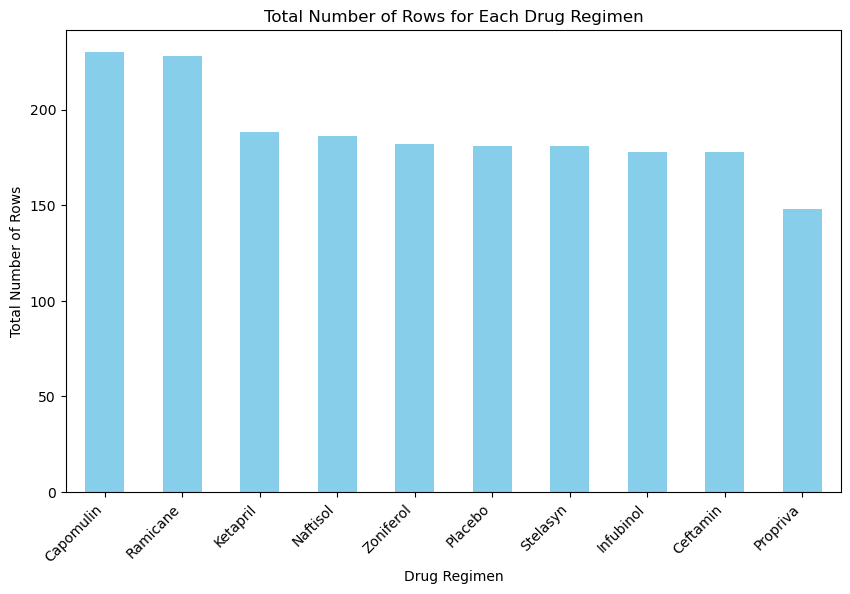

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Plot the results as a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

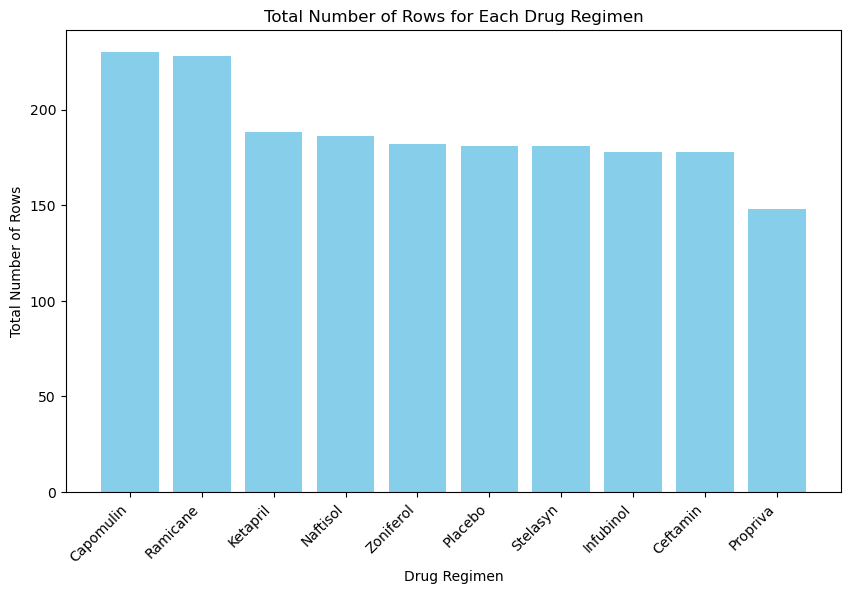

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


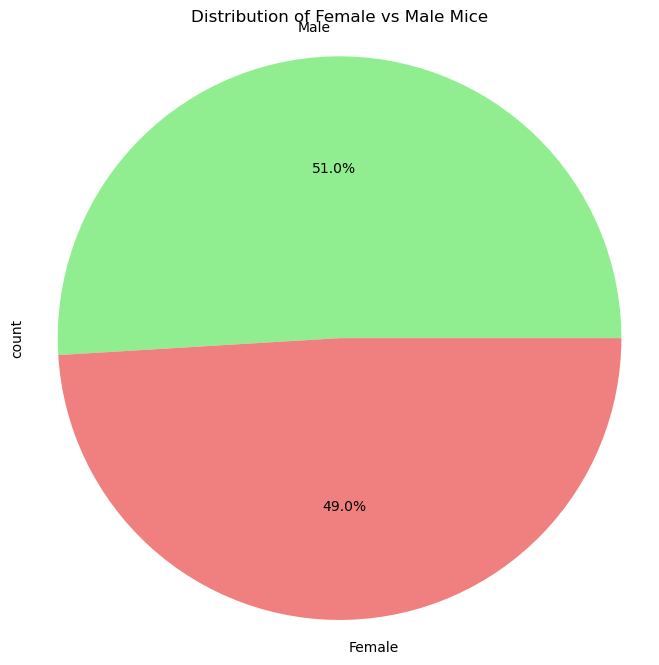

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the count of each gender
gender_counts = clean_data['Sex'].value_counts()

# Plot the results as a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], figsize=(8, 8))

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


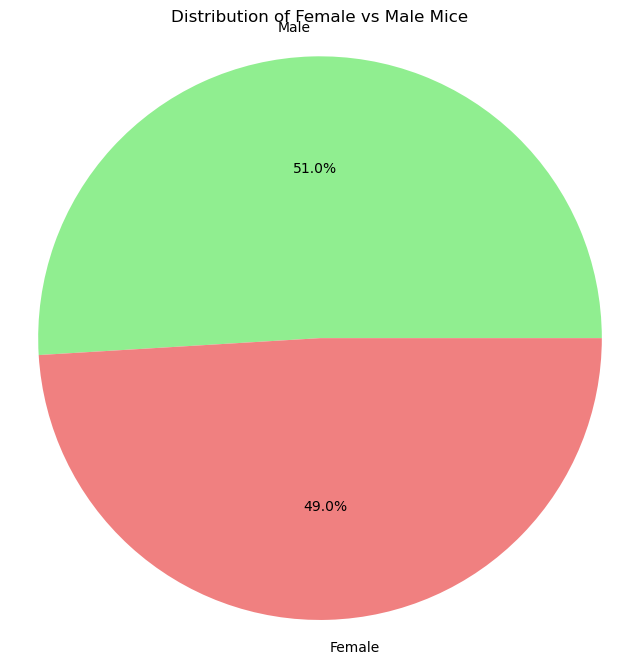

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt
# Calculate the count of each gender
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Define the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the clean_data DataFrame to include only the specified treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Group the filtered DataFrame by 'Mouse ID' and find the maximum 'Timepoint' for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the max_timepoints with the original DataFrame to get the final tumor volume for each mouse
final_tumor_volume_df = pd.merge(max_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])

# Display the DataFrame containing the final tumor volume for each mouse
final_tumor_volume_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Define the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the clean_data DataFrame to include only the specified treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Group the filtered DataFrame by 'Mouse ID' and find the maximum 'Timepoint' for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the max_timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
